In [101]:
#  Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix   #for generating array matrix

from sklearn.neighbors import NearestNeighbors

In [102]:
movies_df=pd.read_csv('movies.csv')    #Read from movies.csv using pandas
rating_df=pd.read_csv('ratings.csv')   #Read from ratings.csv using pandas

In [103]:
# Remove the 'genres' column from the movies DataFrame
movies_df = movies_df.drop('genres', axis=1)

In [104]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [105]:
# Remove the 'timestamp' column from the ratings DataFrame
rating_df = rating_df.drop('timestamp', axis=1)

In [106]:
# Display the first few rows of the ratings DataFrame
rating_df.head()


,userId,movieId,rating
0,1,1,4.000
1,1,3,4.000
2,1,6,4.000
3,1,47,5.000
4,1,50,5.000


In [107]:
# Merge the two DataFrames on the 'movieId' column to 
# combine movie ratings with movie information
combine_movie_rating = pd.merge(rating_df, movies_df, on='movieId')

In [108]:
#Using dropna to drop missing values in 'title'
combine_movie_rating = combine_movie_rating.dropna(subset=['title'])

In [109]:
# Count the total number of ratings for each movie
movie_ratingCount = combine_movie_rating.groupby(by=['title'])['rating'] \
    .count() \
    .reset_index() \
    .rename(columns={'rating': 'totalRatingCount'})

# Display the first few rows of the movie_ratingCount DataFrame
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [110]:
# Merging the DataFrames to include the 'totalRatingCount' for each movie
rating_with_totalRatingCount=combine_movie_rating.merge(movie_ratingCount,left_on='title',right_on='title',how='left')

rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [111]:
# Set the display format for floating-point numbers to 3 decimal places
pd.set_option('display.float_format',lambda x: '%.3f' %x)

# Display the statistical summary of the 'totalRatingCount' column
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


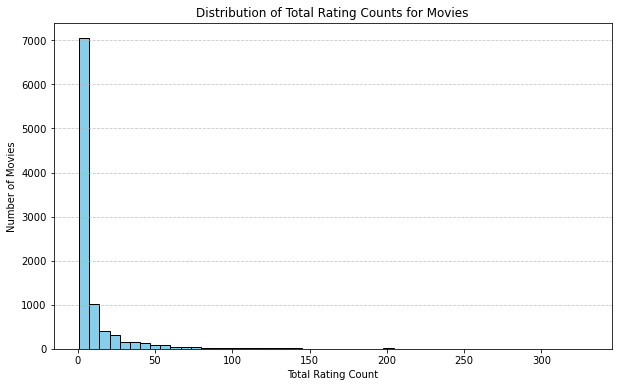

In [112]:
# Create a histogram to visualize the distribution of totalRatingCount
plt.figure(figsize=(10, 6))
plt.hist(movie_ratingCount['totalRatingCount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Rating Counts for Movies')
plt.xlabel('Total Rating Count')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [113]:
# Set a popularity threshold
'''
The "popularity threshold" is a criterion or cutoff point used to determine which items or entities (in this case, movies) 
are considered popular based on a specific measure (such as the number of ratings). Items that meet or exceed 
this threshold are considered popular, while those below it are not.
'''
popularity_threshold = 50

In [114]:
# Filter movies that meet the popularity threshold
rating_popular_movie = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')

rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [115]:
rating_popular_movie.shape

(41362, 5)

In [116]:
#  First lets create a pivot matrix

movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


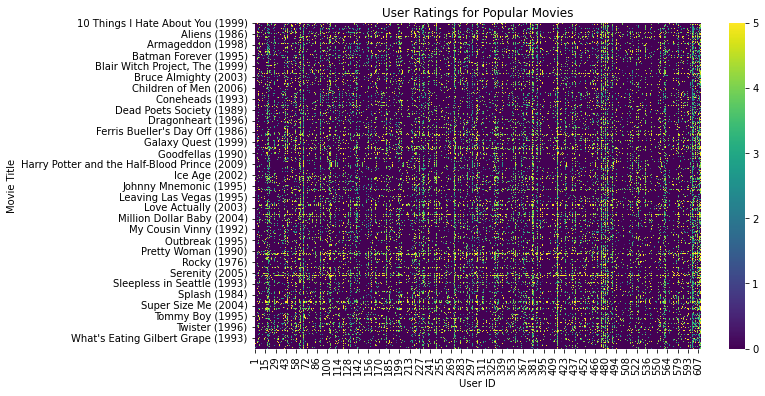

In [117]:
# Visualize the pivot matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(movie_features_df, cmap='viridis')
plt.title('User Ratings for Popular Movies')
plt.xlabel('User ID')
plt.ylabel('Movie Title')
plt.show()

In [120]:
# For generating array matrix using scipy
movie_features_df_matrix=csr_matrix(movie_features_df.values)

print(movie_features_df_matrix)



  (0, 11)	5.0
  (0, 18)	3.0
  (0, 66)	4.5
  (0, 90)	5.0
  (0, 102)	5.0
  (0, 109)	4.0
  (0, 130)	4.0
  (0, 151)	1.0
  (0, 156)	3.5
  (0, 174)	4.5
  (0, 179)	4.0
  (0, 195)	1.0
  (0, 197)	5.0
  (0, 216)	2.0
  (0, 233)	5.0
  (0, 246)	3.5
  (0, 257)	4.5
  (0, 271)	3.0
  (0, 272)	4.0
  (0, 277)	4.0
  (0, 283)	3.0
  (0, 295)	2.5
  (0, 304)	0.5
  (0, 313)	3.0
  (0, 322)	3.0
  :	:
  (449, 378)	2.0
  (449, 384)	3.0
  (449, 410)	0.5
  (449, 411)	4.0
  (449, 416)	4.0
  (449, 417)	4.0
  (449, 421)	3.0
  (449, 423)	2.0
  (449, 435)	2.5
  (449, 444)	3.0
  (449, 476)	4.5
  (449, 479)	5.0
  (449, 480)	4.5
  (449, 485)	1.5
  (449, 491)	5.0
  (449, 521)	4.0
  (449, 530)	4.0
  (449, 538)	1.5
  (449, 556)	4.0
  (449, 557)	3.0
  (449, 569)	5.0
  (449, 585)	2.5
  (449, 595)	4.5
  (449, 603)	3.0
  (449, 605)	4.0


In [124]:
# k-nearest neighbors model (KNN) for recommendation
# - 'metric='cosine'' specifies the distance metric to be used, in this case, cosine similarity.
#   Cosine similarity measures the cosine of the angle between two non-zero vectors and is commonly used for recommendation systems.
# - 'algorithm='brute'' specifies the algorithm used for finding nearest neighbors. 'Brute' force search computes distances
#   between all pairs of points, which is suitable for small to medium-sized

'''
Cosine Similarity:

sim(A,B)=cos(X)=A.B/(modulus(A)*modulus(B))
where X is the angle between A and B.
'''
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [125]:
movie_features_df.shape

(450, 606)

In [134]:
# Choose a random movie for recommendation
query_index = np.random.choice(movie_features_df.shape[0])
print("Query Index:", query_index)

Query Index: 240


In [135]:
# Find the nearest neighbors for the chosen movie
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

In [136]:
# Print movie recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendations for {0}:\n".format(movie_features_df.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}".format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Leaving Las Vegas (1995):

1: Dead Man Walking (1995), with distance of 0.43989756796168566
2: Twelve Monkeys (a.k.a. 12 Monkeys) (1995), with distance of 0.5392851231935292
3: Heat (1995), with distance of 0.5603442623696098
4: Sense and Sensibility (1995), with distance of 0.5969364093812419
5: Fargo (1996), with distance of 0.5974010696406491
